In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

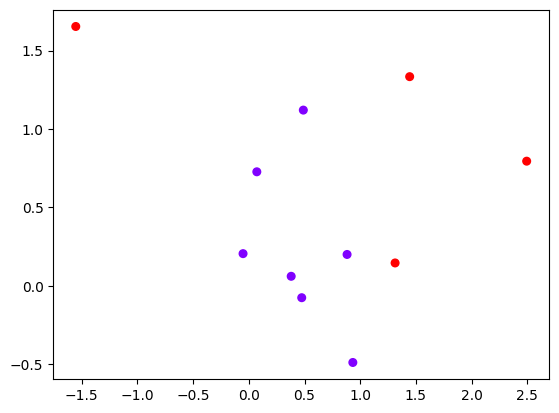

In [2]:
class_1_ = 7
class_2_ = 4
centers_ = [[0.0, 0.0], [1, 1]]
clusters_std = [0.5, 1]
X_, y_ = make_blobs(n_samples=[class_1_, class_2_],
                    centers=centers_,
                    cluster_std=clusters_std,
                    random_state=0, shuffle=False)
plt.scatter(X_[:, 0], X_[:, 1], c=y_, cmap="rainbow", s=30)

In [3]:
from sklearn.linear_model import LogisticRegression as LogiR

In [4]:
clf_lo = LogiR().fit(X_, y_)

In [5]:
prob = clf_lo.predict_proba(X_)

In [6]:
import pandas as pd

prob = pd.DataFrame(prob)
prob.columns = ["0", "1"]
prob

,0,1
0,0.694619,0.305381
1,0.510931,0.489069
2,0.820038,0.179962
3,0.785647,0.214353
4,0.777387,0.222613
5,0.656634,0.343366
6,0.768586,0.231414
7,0.349171,0.650829
8,0.366184,0.633816
9,0.663272,0.336728


In [7]:
#手动调节阈值，来改变我们的模型效果
for i in range(prob.shape[0]):
    if prob.loc[i, "1"] > 0.5:
        prob.loc[i, "pred"] = 1
    else:
        prob.loc[i, "pred"] = 0

In [8]:
prob

,0,1,pred
0,0.694619,0.305381,0.0
1,0.510931,0.489069,0.0
2,0.820038,0.179962,0.0
3,0.785647,0.214353,0.0
4,0.777387,0.222613,0.0
5,0.656634,0.343366,0.0
6,0.768586,0.231414,0.0
7,0.349171,0.650829,1.0
8,0.366184,0.633816,1.0
9,0.663272,0.336728,0.0


In [9]:
prob["y_true"] = y_
prob = prob.sort_values(by="1", ascending=False)
prob

,0,1,pred,y_true
7,0.349171,0.650829,1.0,1
8,0.366184,0.633816,1.0,1
1,0.510931,0.489069,0.0,0
10,0.607529,0.392471,0.0,1
5,0.656634,0.343366,0.0,0
9,0.663272,0.336728,0.0,1
0,0.694619,0.305381,0.0,0
6,0.768586,0.231414,0.0,0
4,0.777387,0.222613,0.0,0
3,0.785647,0.214353,0.0,0


In [10]:
from sklearn.metrics import confusion_matrix as CM, precision_score as P, recall_score as R

In [11]:
CM(prob.loc[:, "y_true"], prob.loc[:, "pred"], labels=[1, 0])

array([[2, 2],
       [0, 7]], dtype=int64)

In [12]:
P(prob.loc[:, "y_true"], prob.loc[:, "pred"], labels=[1, 0])

1.0

In [13]:
R(prob.loc[:, "y_true"], prob.loc[:, "pred"], labels=[1, 0])

0.5

In [14]:
for i in range(prob.shape[0]):
    if prob.loc[i, "1"] > 0.4:
        prob.loc[i, "pred"] = 1
    else:
        prob.loc[i, "pred"] = 0

In [15]:
prob

,0,1,pred,y_true
7,0.349171,0.650829,1.0,1
8,0.366184,0.633816,1.0,1
1,0.510931,0.489069,1.0,0
10,0.607529,0.392471,0.0,1
5,0.656634,0.343366,0.0,0
9,0.663272,0.336728,0.0,1
0,0.694619,0.305381,0.0,0
6,0.768586,0.231414,0.0,0
4,0.777387,0.222613,0.0,0
3,0.785647,0.214353,0.0,0


In [16]:
CM(prob.loc[:, "y_true"], prob.loc[:, "pred"], labels=[1, 0])

array([[2, 2],
       [1, 6]], dtype=int64)

In [17]:
P(prob.loc[:, "y_true"], prob.loc[:, "pred"], labels=[1, 0])

0.6666666666666666

In [18]:
R(prob.loc[:, "y_true"], prob.loc[:, "pred"], labels=[1, 0])

0.5

In [20]:
class_1 = 500  #类别1有500个样本
class_2 = 50  #类别2只有50个
centers = [[0.0, 0.0], [2.0, 2.0]]  #设定两个类别的中心
clusters_std = [1.5, 0.5]  #设定两个类别的方差，通常来说，样本量比较大的类别会更加松散
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

In [21]:
clf_proba = svm.SVC(kernel='linear', probability=True).fit(X, y)

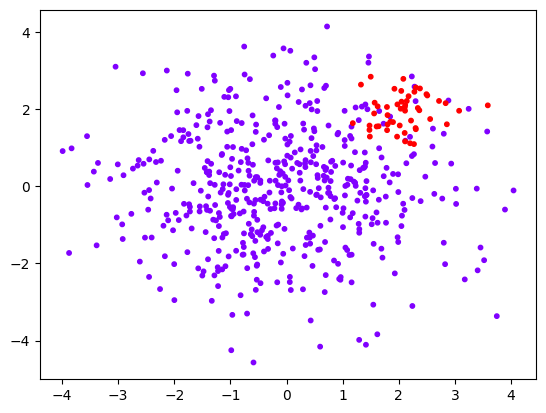

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', s=10)

In [23]:
clf_proba.predict_proba(X)

array([[0.68260446, 0.31739554],
       [0.27190671, 0.72809329],
       [0.95870257, 0.04129743],
       ...,
       [0.1647916 , 0.8352084 ],
       [0.36015476, 0.63984524],
       [0.32362619, 0.67637381]])

In [24]:
clf_proba.predict_proba(X).shape

(550, 2)

In [25]:
clf_proba.decision_function(X)

array([ -0.39182241,   0.95617053,  -2.24996184,  -2.63659269,
        -3.65243197,  -1.67311996,  -2.56396417,  -2.80650393,
        -1.76184723,  -4.7948575 ,  -7.59061196,  -3.66174848,
        -2.2508023 ,  -4.27626526,   0.78571364,  -3.24751892,
        -8.57016271,  -4.45823747,  -0.14034183,  -5.20657114,
        -8.02181046,  -4.18420871,  -5.6222409 ,  -5.12602771,
        -7.22592707,  -5.07749638,  -6.72386021,  -3.4945225 ,
        -3.51475144,  -5.72941551,  -5.79160724,  -8.06232013,
        -4.36303857,  -6.25419679,  -5.59426696,  -2.60919281,
        -3.90887478,  -4.38754704,  -6.46432224,  -4.54279979,
        -4.78961735,  -5.53727469,   1.33920817,  -2.27766451,
        -4.39650854,  -2.97649872,  -2.26771979,  -2.40781748,
        -1.41638181,  -3.26142275,  -2.7712218 ,  -4.87288439,
        -3.2594128 ,  -5.91189118,   1.48676267,   0.5389064 ,
        -2.76188843,  -3.36126945,  -2.64697843,  -1.63635284,
        -5.04695135,  -1.59196902,  -5.5195418 ,  -2.10

In [26]:
clf_proba.decision_function(X).shape

(550,)

In [27]:
#首先来看看如何从混淆矩阵中获取FPR和Recall
cm = CM(prob.loc[:, "y_true"], prob.loc[:, "pred"], labels=[1, 0])
cm

array([[2, 2],
       [1, 6]], dtype=int64)

In [28]:
#FPR
cm[1, 0] / cm[1, :].sum()

0.14285714285714285

In [29]:
#Recall
cm[0, 0] / cm[0, :].sum()

0.5

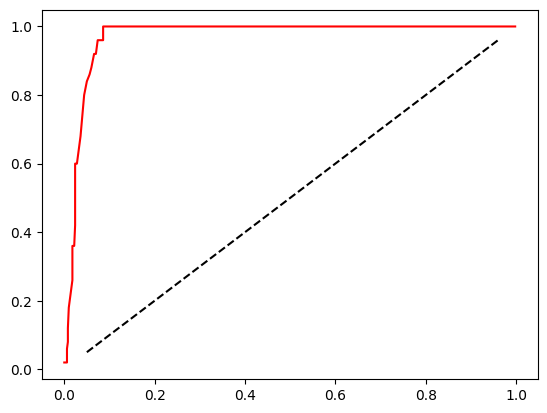

In [30]:
#开始绘图
recall = []
FPR = []
probrange = np.linspace(clf_proba.predict_proba(X)
                        [:, 1].min(), clf_proba.predict_proba(X)[:, 1].max(), num=50, endpoint=False)
from sklearn.metrics import confusion_matrix as CM, recall_score as R
import matplotlib.pyplot as plot

for i in probrange:
    y_predict = []
    for j in range(X.shape[0]):
        if clf_proba.predict_proba(X)[j, 1] > i:
            y_predict.append(1)
        else:
            y_predict.append(0)
    cm = CM(y, y_predict, labels=[1, 0])
    recall.append(cm[0, 0] / cm[0, :].sum())
    FPR.append(cm[1, 0] / cm[1, :].sum())
recall.sort()
FPR.sort()
plt.plot(FPR, recall, c="red")
plt.plot(probrange + 0.05, probrange + 0.05, c="black", linestyle="--")
plt.show()

In [31]:
from sklearn.metrics import roc_curve

FPR, recall, thresholds = roc_curve(y, clf_proba.decision_function(X), pos_label=1)

In [32]:
FPR

array([0.   , 0.   , 0.006, 0.006, 0.008, 0.008, 0.01 , 0.01 , 0.014,
       0.014, 0.018, 0.018, 0.022, 0.022, 0.024, 0.024, 0.028, 0.028,
       0.03 , 0.03 , 0.032, 0.032, 0.036, 0.036, 0.04 , 0.04 , 0.042,
       0.042, 0.044, 0.044, 0.05 , 0.05 , 0.054, 0.054, 0.058, 0.058,
       0.066, 0.066, 0.072, 0.072, 0.074, 0.074, 0.086, 0.086, 1.   ])

In [33]:
recall

array([0.  , 0.02, 0.02, 0.06, 0.06, 0.16, 0.16, 0.2 , 0.2 , 0.22, 0.22,
       0.36, 0.36, 0.42, 0.42, 0.6 , 0.6 , 0.62, 0.62, 0.64, 0.64, 0.68,
       0.68, 0.7 , 0.7 , 0.74, 0.74, 0.76, 0.76, 0.82, 0.82, 0.84, 0.84,
       0.86, 0.86, 0.88, 0.88, 0.92, 0.92, 0.94, 0.94, 0.96, 0.96, 1.  ,
       1.  ])

In [34]:
thresholds

array([  3.18236076,   2.18236076,   1.48676267,   1.35964325,
         1.33920817,   1.14038015,   1.13383091,   1.00003406,
         0.85085628,   0.84476439,   0.78571364,   0.60568093,
         0.5389064 ,   0.46718521,   0.44396046,   0.03907036,
        -0.07011269,  -0.10668727,  -0.1258212 ,  -0.13845693,
        -0.14034183,  -0.16790648,  -0.2040958 ,  -0.22137683,
        -0.24381463,  -0.26762451,  -0.34446784,  -0.3467975 ,
        -0.39182241,  -0.40676459,  -0.4589064 ,  -0.46310299,
        -0.49195707,  -0.5088941 ,  -0.53560561,  -0.55152081,
        -0.62628865,  -0.67580418,  -0.78127198,  -0.79874442,
        -0.88438995,  -0.91257798,  -1.01417607,  -1.08601917,
       -10.31959605])

In [35]:
from sklearn.metrics import roc_auc_score as AUC

area = AUC(y, clf_proba.decision_function(X))

In [36]:
area

0.9696400000000001

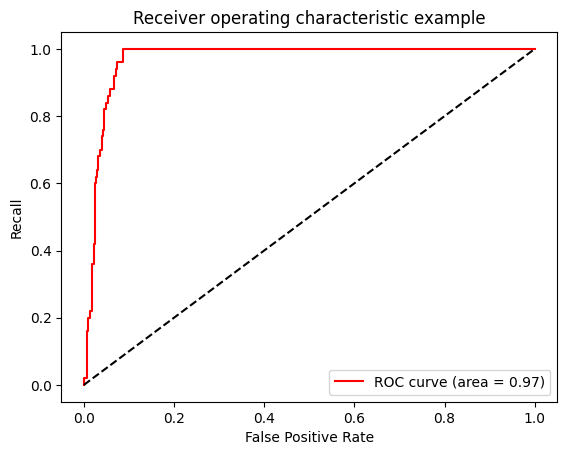

In [37]:
plt.figure()
plt.plot(FPR, recall, color='red',
         label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [38]:
maxindex = (recall - FPR).tolist().index(max(recall - FPR))

In [39]:
thresholds[maxindex]

-1.0860191749391506

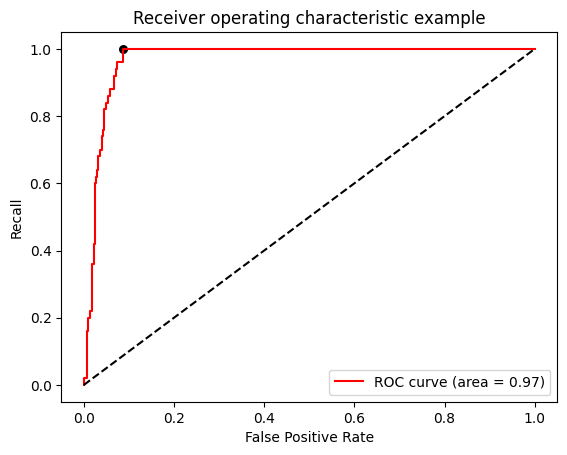

In [40]:
#把上述代码放入这段代码中：
plt.figure()
plt.plot(FPR, recall, color='red',
         label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.scatter(FPR[maxindex], recall[maxindex], c="black", s=30)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()